# Support Vector Regression (SVR)

## Importing the libraries

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [7]:
dataset = pd.read_csv('Position_Salaries.csv')
x = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [8]:
y = y.reshape(len(y),1)

## Feature Scaling

In [9]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
sc_y=StandardScaler()
x=sc_x.fit_transform(x)
y=sc_y.fit_transform(y)

In [11]:
print(x)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [12]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training the SVR model on the whole dataset

In [10]:
from sklearn.svm import SVR
regressor=SVR(kernel='rbf')
regressor.fit(x,y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Predicting a new result

In [14]:
sc_y.inverse_transform(regressor.predict(sc_x.transform([[6.5]])).reshape(-1,1))

array([[170370.0204065]])

## Visualising the SVR results

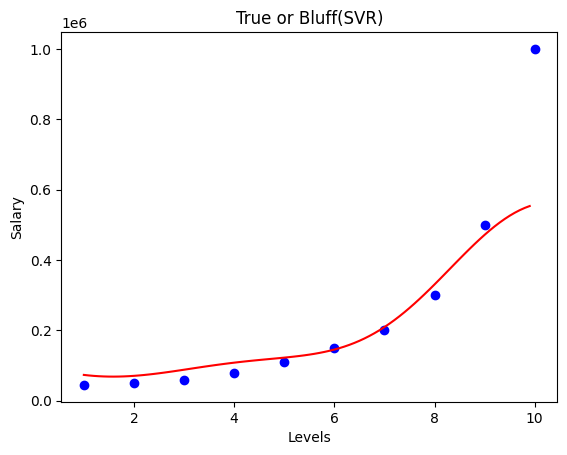

In [20]:
x_grid=np.arange(min(sc_x.inverse_transform(x)),max(sc_x.inverse_transform(x)),0.1)
x_grid=x_grid.reshape(len(x_grid),1)
plt.scatter(sc_x.inverse_transform(x),sc_y.inverse_transform(y),color='blue')
plt.plot(x_grid,sc_y.inverse_transform(regressor.predict(sc_x.transform(x_grid)).reshape(-1,1)),color='red')
plt.title('True or Bluff(SVR)')
plt.xlabel('Levels')
plt.ylabel('Salary')
plt.show()